# A Beginner-Friendly Guide to PyTorch and How it Works from Scratch 

Follow blog post here: https://www.analyticsvidhya.com/blog/2019/09/introduction-to-pytorch-from-scratch/

Download and install Pytorch from here: https://pytorch.org/get-started/locally/

## Introduction

Let's first import library 

In [1]:
import torch

### Introduction to Tensors

Pytorch tensors is very similar to numpy arrays. We initialize them as follows but can also use torch.ones(), torch.zeros() and random as shown below.

In [2]:
a = torch.tensor([[3,3,3],[2,2,2],[1,1,1]])
print(type(a),'\n', a)

<class 'torch.Tensor'> 
 tensor([[3, 3, 3],
        [2, 2, 2],
        [1, 1, 1]])


In [3]:
az = torch.zeros((3,3))
print(az)

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [4]:
ao = torch.ones((3,3))
print(ao)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])


In [5]:
torch.manual_seed(2)
ar = torch.randn(3,3)
print(ar)

tensor([[ 0.3923, -0.2236, -0.3195],
        [-1.2050,  1.0445, -0.6332],
        [ 0.5731,  0.5409, -0.3919]])


#### Matrix operations

Is done similarly to numpy. 

In [6]:
print('ar+ao: ',torch.add(ar,ao))
print('ar-ao: ',torch.sub(ar,ao))
print('ar*ao: ',torch.mm(ar,ao))
print('ar/ao: ',torch.div(ar,ao))

ar+ao:  tensor([[ 1.3923,  0.7764,  0.6805],
        [-0.2050,  2.0445,  0.3668],
        [ 1.5731,  1.5409,  0.6081]])
ar-ao:  tensor([[-0.6077, -1.2236, -1.3195],
        [-2.2050,  0.0445, -1.6332],
        [-0.4269, -0.4591, -1.3919]])
ar*ao:  tensor([[-0.1508, -0.1508, -0.1508],
        [-0.7938, -0.7938, -0.7938],
        [ 0.7221,  0.7221,  0.7221]])
ar/ao:  tensor([[ 0.3923, -0.2236, -0.3195],
        [-1.2050,  1.0445, -0.6332],
        [ 0.5731,  0.5409, -0.3919]])


<b>Transposing tensors</b>  is done with torch.t()

In [7]:
print('a =',a)
at = torch.t(a)
print('\n transpose(a) = \n', at)

a = tensor([[3, 3, 3],
        [2, 2, 2],
        [1, 1, 1]])

 transpose(a) = 
 tensor([[3, 2, 1],
        [3, 2, 1],
        [3, 2, 1]])


Use torch.cat((a,b)) to <b>Concatenting tensors </b>

In [8]:
a = torch.ones((2,2))
b = torch.ones((2,2))

cat_ab = torch.cat((a,b))
print(cat_ab)

tensor([[1., 1.],
        [1., 1.],
        [1., 1.],
        [1., 1.]])


We use change dim if we want to concatenate the tensors horizontally. 

In [9]:
cat_ab = torch.cat((a,b), dim=1)
print(cat_ab)

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.]])


<b> Reshaping tensors </b>, similarly to numpy is done by .reshape() function.

In [10]:
# setting random seed
torch.manual_seed(2)

# init tensor
a = torch.rand(3,3)
print(a, a.shape)

# reshaping tensor with .reshape()
a_reshaped = a.reshape(1,9)
print(a_reshaped, a_reshaped.shape)

tensor([[0.6147, 0.3810, 0.6371],
        [0.4745, 0.7136, 0.6190],
        [0.4425, 0.0958, 0.6142]]) torch.Size([3, 3])
tensor([[0.6147, 0.3810, 0.6371, 0.4745, 0.7136, 0.6190, 0.4425, 0.0958, 0.6142]]) torch.Size([1, 9])


### Common PyTorch Modules

#### Autograd Module
PyTorch uses a technique called automatic differentiation. It records all the operations that we are performing and replays it backward to compute gradients. This technique helps us to save time on each epoch as we are calculating the gradients on the forward pass itself.

In [11]:
# init tensor
a = torch.ones((3,3), requires_grad=True)

# perform operations
b = a + 2
c = b.mean()

We see that c = sum(a+2)/9 and by manually calulate the gradients it would be 1/9=0.111... We verify this using pytorch.

In [12]:
c.backward()
print(a.grad)

tensor([[0.1111, 0.1111, 0.1111],
        [0.1111, 0.1111, 0.1111],
        [0.1111, 0.1111, 0.1111]])


#### Optim Module
The Optim module in PyTorch has pre-written codes for most of the optimizers that are used while building a neural network. We just have to import them and then they can be used to build models.

In [13]:
# importing the optim module
from torch import optim

# adam
## adam = optim.Adam(model.parameters(), lr=learning_rate)

Pytorch have support for most commonly used optimizers including: 
 - SGD
 - ADAM
 - Adadelta
 - Adagrad
 - AdamW
 - SparseAdam
 - Adamax
 - RMSprop
 - And more...

### Building a Neural Network from Scratch in PyTorch

First we init model parameters we need

In [14]:
# input tensor
X = torch.Tensor([[1,0,1,0],[1,0,1,1],[0,1,0,1]])

# output tensor 
y = torch.Tensor([[1],[1],[0]])

# define activation function sigmoid and derivative of the 
# sigmoid for backpropagation
def sigmoid(x):
    return 1/(1 + torch.exp(-x))

def der_sigmoid(x):
    return x * (1-x)

# init variables 
epoch = 7000
lr_rate = 0.01
X_neurons = X.shape[1] # nbr of features in data set
hidden_neurons = 3 # nbr of hidden layers
Y_neurons = 1 # nbr of output layers

# init weights and bias, we randomly init weights and biases 
wh=torch.randn(X_neurons, hidden_neurons).type(torch.FloatTensor)
bh=torch.randn(1, hidden_neurons).type(torch.FloatTensor)
wout=torch.randn(hidden_neurons, Y_neurons)
bout=torch.randn(1, Y_neurons)

Finally, we will create a neural network. 

In [15]:
for i in range(epoch):
    #Forward Propogation
    hidden_layer_input1 = torch.mm(X, wh)
    hidden_layer_input = hidden_layer_input1 + bh
    hidden_layer_activations = sigmoid(hidden_layer_input)

    output_layer_input1 = torch.mm(hidden_layer_activations, wout)
    output_layer_input = output_layer_input1 + bout
    output = sigmoid(output_layer_input)

    #Backpropagation
    E = y-output
    slope_output_layer = der_sigmoid(output)
    slope_hidden_layer = der_sigmoid(hidden_layer_activations)
    d_output = E * slope_output_layer
    Error_at_hidden_layer = torch.mm(d_output, wout.t())
    d_hiddenlayer = Error_at_hidden_layer * slope_hidden_layer
    wout += torch.mm(hidden_layer_activations.t(), d_output) *lr_rate
    bout += d_output.sum() *lr_rate
    wh += torch.mm(X.t(), d_hiddenlayer) *lr_rate
    bh += d_output.sum() *lr_rate

Result of our network 

In [16]:
print('actual :\n', y, '\n')
print('predicted :\n', output)

actual :
 tensor([[1.],
        [1.],
        [0.]]) 

predicted :
 tensor([[0.9216],
        [0.9177],
        [0.1169]])


This is how we can build and train a neural network from scratch in PyTorch. Let’s now take things up a notch and dive into a case study. We will try to solve that case study using the techniques we have learned in this article.

## Solving an Image Classification Problem using PyTorch

Based on following guide: https://www.analyticsvidhya.com/blog/2019/10/building-image-classification-models-cnn-pytorch/

Our task is to identify the type of apparel by looking at a variety of apparel images. It’s a classic image classification problem using computer vision. This dataset, taken from the DataHack Platform, can be downloaded here: https://datahack.analyticsvidhya.com/contest/practice-problem-identify-the-apparels/?utm_source=blog&utm_medium=introduction-to-pytorch-from-scratch.

There are 70,000 images, out of which 60,000 are in the training set and the remaining 10,000 in the test set. All the images are grayscale images of size (28*28).

The dataset contains two folders – one each for the training set and the test set. In each folder, there is a .csv file that has the id of the image and its corresponding label and a folder containing the images for that particular set.

### Loading the data 

In [22]:
# importing the libraries
import pandas as pd
import numpy as np

# for reading and displaying images
from skimage.io import imread
import matplotlib.pyplot as plt
%matplotlib inline

# for creating validation set
from sklearn.model_selection import train_test_split

# for evaluating the model
from sklearn.metrics import accuracy_score
from tqdm import tqdm

# PyTorch libraries and modules
from torch.autograd import Variable
from torch.nn import Linear, ReLU, CrossEntropyLoss, Sequential, Conv2d, MaxPool2d, Module, Softmax, BatchNorm2d, Dropout
from torch.optim import Adam, SGD

In [26]:
# loading dataset
train = pd.read_csv('/scratch/jonatank/data/apparel_comp/train_LbELtWX/train.csv')
test = pd.read_csv('/scratch/jonatank/data/apparel_comp/test_ScVgIM0/test.csv')

sample_submission = pd.read_csv('sample_submission_I5njJSF.csv')

train.head()

,id,label
0,1,9
1,2,0
2,3,0
3,4,3
4,5,0


'id' here represents the name of the image (we just have to add .png as the images are in png format) and 'label 'is the corresponding class of that particular image.

Next, we will load all the training images using the train.csv file. We will use a for loop to read all the images from the training set and finally store them as a NumPy array:

In [28]:
# loading training imgs
train_img = np.zeros((np.count_nonzero(train['id']),28,28))

# loop through every train img and load them to train_img numpy array
for i, img_name in enumerate(train['id']):
    img_path = '/scratch/jonatank/data/apparel_comp/train_LbELtWX/train/' + str(img_name) + '.png'
    img = imread(img_path, as_gray=True)
    img /= 255.0 # normaliz pixel values
    img = img.astype('float32') # convert to float 32
    train_img[i,:,:] = img
    
print(train_img.shape)

# Create target for training the model
train_img_y = train['label'].values
print(train_img_y.shape)

(60000, 28, 28)
(60000,)


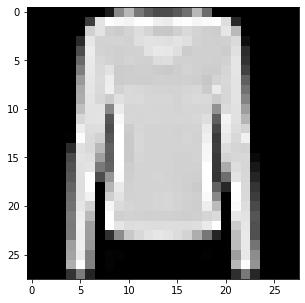

In [29]:
# random number generator
seed = 123
rng = np.random.RandomState(seed)

# choose a random index
rand_idx = np.random.randint(train_img.shape[0], size=1)[0]

# print an image
plt.figure(figsize=(5,5))
plt.imshow(train_img[rand_idx,:,:] , cmap='gray')

### Training the model

In [30]:
# create validation set with train_test_split()
train_x, val_x, train_y, val_y = train_test_split(train_img, train_img_y, test_size = 0.1)

print((train_x.shape, train_y.shape), (val_x.shape, val_y.shape))

((54000, 28, 28), (54000,)) ((6000, 28, 28), (6000,))


We have kept 10% data in the validation set and the remaining in the training set. Next, let’s convert the images and the targets into torch format:

In [31]:
# convert training image numpy array to pytorch
train_x = train_x.reshape(train_x.shape[0],1,train_x.shape[1],train_x.shape[2])
train_x = torch.from_numpy(train_x)

train_y = train_y.astype(int)
train_y = torch.from_numpy(train_y)

print(train_x.shape, train_y.shape)

# also we convert validation set
val_x = val_x.reshape(val_x.shape[0],1,val_x.shape[1],val_x.shape[2])
val_x = torch.from_numpy(val_x)

val_y = val_y.astype(int)
val_y = torch.from_numpy(val_y)

print(val_x.shape, val_y.shape)

torch.Size([54000, 1, 28, 28]) torch.Size([54000])
torch.Size([6000, 1, 28, 28]) torch.Size([6000])


In [32]:
# define architecture
class Net(Module):   
    def __init__(self):
        super(Net, self).__init__()

        self.cnn_layers = Sequential(
            # Defining a 2D convolution layer
            Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
            # Defining another 2D convolution layer
            Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
            BatchNorm2d(4),
            ReLU(inplace=True),
            MaxPool2d(kernel_size=2, stride=2),
        )

        self.linear_layers = Sequential(
            Linear(4 * 7 * 7, 10)
        )

    # Defining the forward pass    
    def forward(self, x):
        x = self.cnn_layers(x)
        x = x.view(x.size(0), -1)
        x = self.linear_layers(x)
        return x

Let’s now call this model, and define the optimizer and the loss function for the model:

In [33]:
# defining the model
model = Net()
# defining the optimizer
optimizer = Adam(model.parameters(), lr=0.07)
# defining the loss function
criterion = CrossEntropyLoss()
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
    
print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU(inplace=True)
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=196, out_features=10, bias=True)
  )
)


This is the architecture of the model. We have two Conv2d layers and a Linear layer. Next, we will define a function to train the model:

In [34]:
def train(epoch):
    model.train()
    tr_loss = 0
    # getting the training set
    x_train, y_train = Variable(train_x), Variable(train_y)
    # getting the validation set
    x_val, y_val = Variable(val_x), Variable(val_y)
    # converting the data into GPU format
    if torch.cuda.is_available():
        x_train = x_train.cuda()
        y_train = y_train.cuda()
        x_val = x_val.cuda()
        y_val = y_val.cuda()

    # clearing the Gradients of the model parameters
    optimizer.zero_grad()
    
    # prediction for training and validation set
    output_train = model(x_train.float())
    output_val = model(x_val.float())

    # computing the training and validation loss
    loss_train = criterion(output_train, y_train)
    loss_val = criterion(output_val, y_val)
    train_losses.append(loss_train)
    val_losses.append(loss_val)

    # computing the updated weights of all the model parameters
    loss_train.backward()
    optimizer.step()
    tr_loss = loss_train.item()
    if epoch%2 == 0:
        # printing the validation loss
        print('Epoch : ',epoch+1, '\t', 'loss :', loss_val)

Finally, we will train the model for 25 epochs and store the training and validation losses:

In [35]:
# defining the number of epochs
n_epochs = 25
# empty list to store training losses
train_losses = []
# empty list to store validation losses
val_losses = []
# training the model
for epoch in range(n_epochs):
    train(epoch)

Epoch :  1 	 loss : tensor(2.4563, grad_fn=<NllLossBackward>)
Epoch :  3 	 loss : tensor(3.6778, grad_fn=<NllLossBackward>)
Epoch :  5 	 loss : tensor(2.3732, grad_fn=<NllLossBackward>)
Epoch :  7 	 loss : tensor(1.8437, grad_fn=<NllLossBackward>)
Epoch :  9 	 loss : tensor(1.9036, grad_fn=<NllLossBackward>)
Epoch :  11 	 loss : tensor(1.9239, grad_fn=<NllLossBackward>)
Epoch :  13 	 loss : tensor(1.7548, grad_fn=<NllLossBackward>)
Epoch :  15 	 loss : tensor(1.5527, grad_fn=<NllLossBackward>)
Epoch :  17 	 loss : tensor(1.3450, grad_fn=<NllLossBackward>)
Epoch :  19 	 loss : tensor(1.1542, grad_fn=<NllLossBackward>)
Epoch :  21 	 loss : tensor(1.0464, grad_fn=<NllLossBackward>)
Epoch :  23 	 loss : tensor(1.0583, grad_fn=<NllLossBackward>)
Epoch :  25 	 loss : tensor(0.9613, grad_fn=<NllLossBackward>)


Lets plot training and validation loss:

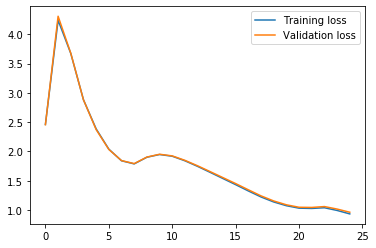

In [36]:
# plotting the training and validation loss
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()

We can clearly see that the training and validation losses are in sync. It is a good sign as the model is generalizing well on the validation set.

Let’s check the accuracy of the model on the training and validation set:

In [37]:
# prediction for training set
with torch.no_grad():
    output = model(train_x.float())
    
softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

# accuracy on training set
accuracy_score(train_y, predictions)

0.6675555555555556

#### Generating predictions for the test set
We will load all the images in the test set, do the same pre-processing steps as we did for the training set and finally generate predictions.


In [161]:
# loading training imgs
test_img = np.zeros((np.count_nonzero(test['id']),28,28))

# loop through every train img and load them to train_img numpy array
for i, img_name in enumerate(test['id']):
    img_path = 'test_ScVgIM0/test/' + str(img_name) + '.png'
    img = imread(img_path, as_gray=True)
    img /= 255.0 # normaliz pixel values
    img = img.astype('float32') # convert to float 32
    test_img[i,:,:] = img
    
# convert list to torch tensor
test_x = test_img.reshape(test_img.shape[0],1,test_img.shape[1],test_img.shape[2])
test_x = torch.from_numpy(test_x)
print(test_x.shape)

torch.Size([10000, 1, 28, 28])


In [164]:
# generating predictions for test set
with torch.no_grad():
    output = model(test_x.float())

softmax = torch.exp(output).cpu()
prob = list(softmax.numpy())
predictions = np.argmax(prob, axis=1)

In [165]:
# replacing the label with prediction
sample_submission['label'] = predictions
sample_submission.head()

,id,label
0,60001,9
1,60002,2
2,60003,1
3,60004,1
4,60005,6


In [166]:
sample_submission.to_csv('submission.csv', index=False)

This gave us a score of <b> 0.67025 </b>

#### Implementation with fastai and resnet32 
See kaggle kernel: https://www.kaggle.com/jkronander/identify-the-apparels-competition

With score <b>0.936</b> placing us <b>21</b> on scoreboard using fastai to train with resnet50.